# Context:
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df_train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [6]:
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [7]:
df_test.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [8]:
# concatenate both datsets.
df = pd.concat([df_train,df_test],axis=0)
df.reset_index(drop=True,inplace=True)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1.0,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2.0,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2.0,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1.0,NaN


In [9]:
df.shape

(3000, 22)

In [10]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'id'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  3000 non-null   int64  
 1   blue           3000 non-null   int64  
 2   clock_speed    3000 non-null   float64
 3   dual_sim       3000 non-null   int64  
 4   fc             3000 non-null   int64  
 5   four_g         3000 non-null   int64  
 6   int_memory     3000 non-null   int64  
 7   m_dep          3000 non-null   float64
 8   mobile_wt      3000 non-null   int64  
 9   n_cores        3000 non-null   int64  
 10  pc             3000 non-null   int64  
 11  px_height      3000 non-null   int64  
 12  px_width       3000 non-null   int64  
 13  ram            3000 non-null   int64  
 14  sc_h           3000 non-null   int64  
 15  sc_w           3000 non-null   int64  
 16  talk_time      3000 non-null   int64  
 17  three_g        3000 non-null   int64  
 18  touch_sc

Dataset as 21 features and 3000 entries. The meanings of the features are given below.

battery_power: Total energy a battery can store in one time measured in mAh

blue: Has bluetooth or not

clock_speed: speed at which microprocessor executes instructions

dual_sim: Has dual sim support or not

fc: Front Camera mega pixels

four_g: Has 4G or not

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc: Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Mega Bytes

sc_h: Screen Height of mobile in cm

sc_w: Screen Width of mobile in cm

talk_time: longest time that a single battery charge will last when you are

three_g: Has 3G or not

touch_screen: Has touch screen or not

wifi: Has wifi or not

price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [12]:
# No missing values
df.isnull().sum()

battery_power       0
blue                0
clock_speed         0
dual_sim            0
fc                  0
four_g              0
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                  0
px_height           0
px_width            0
ram                 0
sc_h                0
sc_w                0
talk_time           0
three_g             0
touch_screen        0
wifi                0
price_range      1000
id               2000
dtype: int64

In [13]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range      float64
id               float64
dtype: object

In [14]:
df.drop(['id'],axis=1, inplace=True)
df.shape

(3000, 21)

In [15]:
# fill the Null vules in the data
# for Numerical cols using median

for i in df.columns:
    df[i] = df[i].fillna(0)

In [16]:
# Value_counts of the columns
for i in df.columns:
    print(df[i].value_counts())

1715    9
1807    8
560     7
1589    6
1278    6
       ..
606     1
1099    1
551     1
1633    1
1797    1
Name: battery_power, Length: 1275, dtype: int64
1    1506
0    1494
Name: blue, dtype: int64
0.5    612
2.8    118
0.6    114
2.1    113
1.6    113
2.5    110
1.4    109
1.3    106
2.3    106
2.9    100
2.6     95
1.5     94
1.8     94
1.9     93
2.0     92
0.7     92
0.9     92
2.4     91
1.7     90
2.7     88
2.2     88
1.0     87
0.8     87
1.1     84
1.2     83
3.0     49
Name: clock_speed, dtype: int64
1    1536
0    1464
Name: dual_sim, dtype: int64
0     684
1     369
2     286
3     240
4     213
5     213
6     171
7     150
9     119
8     115
10     99
11     80
12     62
13     61
14     36
16     35
15     35
18     21
17      8
19      3
Name: fc, dtype: int64
1    1530
0    1470
Name: four_g, dtype: int64
44    61
27    60
33    60
14    60
57    60
      ..
60    38
62    38
18    37
4     30
59    29
Name: int_memory, Length: 63, dtype: int64
0.1    459
0.5    

In [17]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [18]:
# from scipy.stats import chi2_contingency,ttest_ind

In [19]:
# # perform T-Sample ttest.
# for i in df.columns:
#     g1 = np.array(df[df['price_range'] == 0][i])
#     g2 = np.array(df[df['price_range'] == 1][i])
    
#     t,p = ttest_ind(g1,g2,axis=0,equal_var=False)
    
#     if p<0.05:
#         print('UseFull for modeling',i)
#     else:
#         print('NotUseFull for modeling',i)

In [20]:
# # chi2 Test for categorical values
# for i in df.columns:
#     cb = pd.crosstab(df_train['price_range'],df_train[i])
#     chi,p,dof,exp = chi2_contingency(cb)

#     if p<0.05:
#         print('Useful: ',i)
#     else:
#         print('Not USeful: ',i)

In [21]:
# df = df.drop(['blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','sc_h','talk_time','three_g','touch_screen','wifi'],axis=1)

<AxesSubplot:>

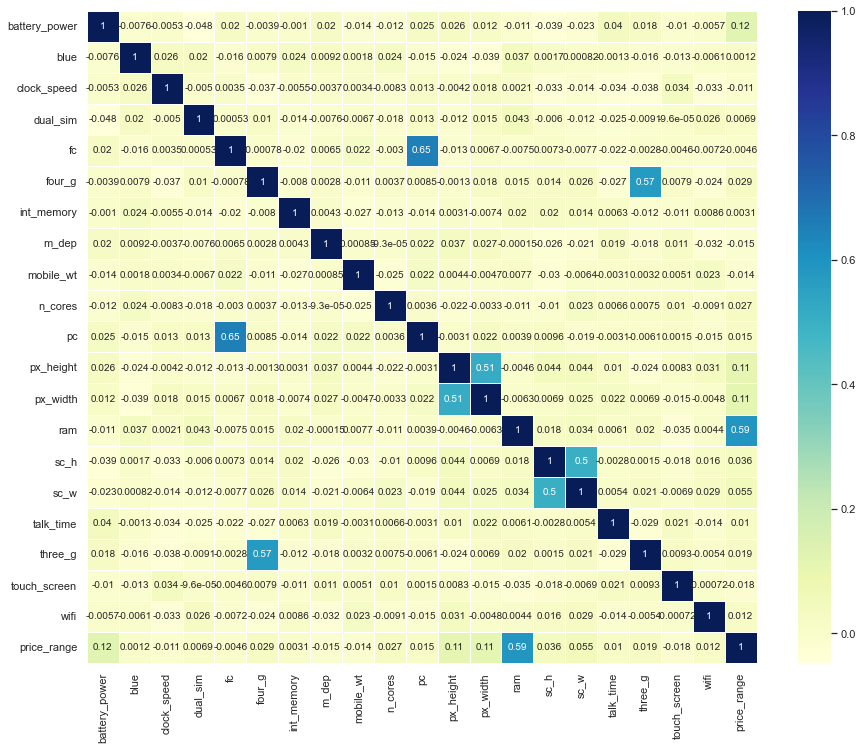

In [22]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", linecolor='white', linewidths=1)

Price_range and ram are correlated to each other (0.59)


In [23]:
corr = df.corr()
corr.sort_values(by=["price_range"], ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.587445
battery_power    0.123653
px_width         0.114218
px_height        0.108657
sc_w             0.055307
sc_h             0.035860
four_g           0.029451
n_cores          0.027115
three_g          0.018917
pc               0.015116
wifi             0.012126
talk_time        0.010179
dual_sim         0.006930
int_memory       0.003133
blue             0.001155
fc              -0.004610
clock_speed     -0.010805
mobile_wt       -0.013611
m_dep           -0.015346
touch_screen    -0.017898
Name: price_range, dtype: float64

In [24]:
# # perform Normalization using MinmaxScaler.
# from sklearn.preprocessing import MinMaxScaler

# ss = MinMaxScaler()
# df = ss.fit_transform(df)

In [25]:
y = df["price_range"].values
X = df.drop(["price_range"],axis=1)

In [26]:
# Standard scaler:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [27]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state=1)

# Logistic Regression:

In [28]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score
lreg_accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of Logistic Regression Model is: ",lreg_accuracy)

Accuracy of Logistic Regression Model is:  55.333333333333336


In [30]:
# Building Decision tree model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,f1_score

dtree = DecisionTreeClassifier(random_state=101)
dtree.fit(x_train, y_train)

dtree_predict = dtree.predict(x_test)

print('Accuracy on Train data: %0.2f'%dtree.score(x_train, y_train))

Accuracy on Train data: 1.00


In [31]:
from sklearn.ensemble import RandomForestClassifier

# RandomForest Model
rf_model = RandomForestClassifier(max_depth=5,max_features='auto',random_state=1,criterion='entropy')

# train the model
rf_model.fit(x_train,y_train)
y_pred_rf = rf_model.predict(x_test)

print('Train Accuracy :',rf_model.score(x_train,y_train))

Train Accuracy : 0.5920833333333333


In [32]:

# define a funtion which gives best Accuracy score.
def score(model):
    model.fit(x_train,y_train)
    predict = model.predict(x_test)

    print('train Accuracy :',model.score(x_train,y_train))

    return predict

In [33]:
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# make the bagging classifier model with best parameters
bgcl_best = BaggingClassifier(random_state=42,
                              base_estimator=dtree,
                              n_estimators = 100,
                              max_samples=len(x_train),
                              bootstrap=True,
                              n_jobs=-1)


# make the AdaBoost classifier with best parameters
adcl_best = AdaBoostClassifier(random_state=10,
                               n_estimators=50,
                               learning_rate=1.0,
                               base_estimator=dtree,
                               algorithm='SAMME.R')


# make gradient Boost Classifier with best parameters
gbcl_best = GradientBoostingClassifier(random_state=10,
                                       n_estimators=200,
                                       min_samples_split=50,
                                       min_samples_leaf=1,
                                       min_impurity_split=0.5,
                                       max_leaf_nodes=10,
                                       max_features='sqrt',
                                       max_depth=3,
                                       learning_rate=0.1,
                                       criterion='mse',
                                       ccp_alpha=0.0)

In [34]:
# score for bgcl
score(bgcl_best)

train Accuracy : 1.0


array([3., 0., 0., 3., 0., 3., 2., 1., 0., 1., 0., 0., 3., 0., 1., 1., 2.,
       3., 0., 0., 0., 2., 0., 0., 1., 0., 0., 2., 3., 1., 0., 0., 3., 0.,
       3., 0., 2., 1., 3., 0., 1., 0., 1., 2., 1., 0., 0., 1., 2., 0., 0.,
       0., 2., 0., 0., 3., 0., 1., 0., 3., 0., 2., 3., 2., 0., 0., 3., 3.,
       0., 0., 2., 0., 0., 2., 0., 2., 0., 2., 0., 2., 1., 2., 1., 2., 0.,
       2., 0., 0., 2., 0., 0., 1., 0., 2., 1., 2., 0., 0., 0., 0., 0., 0.,
       2., 2., 3., 1., 0., 0., 0., 0., 2., 0., 2., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 2., 3., 3., 1., 1., 1., 0., 0., 3., 1., 0., 0.,
       0., 0., 0., 0., 2., 0., 1., 1., 1., 0., 2., 0., 1., 0., 0., 0., 2.,
       0., 2., 2., 0., 1., 0., 2., 2., 3., 2., 2., 1., 1., 2., 1., 1., 0.,
       0., 1., 1., 3., 3., 1., 2., 3., 3., 3., 0., 0., 0., 2., 1., 0., 0.,
       0., 1., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 1., 2.,
       2., 2., 0., 1., 2., 0., 1., 3., 0., 3., 1., 0., 0., 3., 2., 2., 0.,
       3., 0., 3., 2., 0.

In [35]:
# score for adcl
score(adcl_best)

train Accuracy : 1.0


array([3., 0., 0., 3., 0., 3., 2., 1., 0., 0., 0., 0., 0., 1., 0., 1., 2.,
       3., 0., 0., 0., 2., 1., 0., 1., 0., 0., 2., 3., 1., 3., 0., 3., 2.,
       3., 3., 2., 1., 3., 0., 0., 0., 1., 2., 0., 0., 1., 0., 1., 1., 0.,
       0., 2., 2., 0., 0., 0., 0., 0., 3., 0., 2., 0., 2., 0., 0., 3., 3.,
       0., 0., 2., 0., 0., 2., 1., 2., 2., 0., 0., 2., 1., 2., 1., 2., 3.,
       2., 1., 0., 2., 0., 0., 1., 0., 0., 1., 0., 2., 0., 0., 1., 0., 2.,
       2., 0., 3., 1., 0., 0., 0., 1., 2., 0., 2., 0., 3., 0., 0., 3., 2.,
       1., 0., 1., 0., 0., 0., 0., 3., 2., 1., 1., 0., 0., 3., 0., 0., 0.,
       0., 0., 0., 1., 2., 0., 1., 1., 1., 0., 2., 0., 1., 1., 2., 0., 2.,
       1., 2., 2., 0., 0., 0., 2., 0., 3., 2., 2., 1., 1., 2., 1., 0., 0.,
       1., 1., 0., 3., 3., 1., 2., 2., 3., 3., 0., 0., 3., 2., 2., 0., 3.,
       0., 0., 3., 3., 2., 3., 0., 1., 1., 2., 0., 0., 0., 2., 0., 0., 2.,
       2., 1., 0., 0., 2., 0., 1., 0., 0., 0., 0., 0., 0., 3., 2., 2., 0.,
       0., 0., 3., 0., 0.

In [36]:
# score for gbcl
score(gbcl_best)

train Accuracy : 0.49416666666666664


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# SVM:

In [37]:
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train, y_train)

SVC(random_state=101)

In [38]:
# Train & Test Accuracies:
print("Train Accuracy of SVM: ", svm.score(x_train, y_train))
print("Test Accuracy of SVM: ", svm.score(x_test, y_test))

Train Accuracy of SVM:  0.6666666666666666
Test Accuracy of SVM:  0.5533333333333333


# GridSearchCV:

In [39]:
from sklearn.neighbors import KNeighborsClassifier
### Number of nearest neighbors
knn_clf = KNeighborsClassifier()

In [40]:
knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

In [41]:
param_grid = {'n_neighbors': list(range(1,9)),
             'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }

In [42]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(knn_clf,param_grid,cv=10)

In [43]:
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [44]:
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 8}

# Pipeline_GridSearchcv

In [45]:
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA 
pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), ('clf', LogisticRegression(random_state=1))]) 
pipe_lr.fit(x_train, y_train) 
print('Test Accuracy: %.3f' % pipe_lr.score(x_test, y_test))

Test Accuracy: 0.523
